<a href="https://colab.research.google.com/github/JotaPMendes/cursos/blob/main/introducao_machine_learning_2020/notebooks/introducao_machine_learning_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

filmes = pd.read_csv("movies.csv")
filmes.columns = ("filmeID", "titulo", "generos")
filmes = filmes.set_index("filmeID")
filmes.head()

,titulo,generos
filmeID,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [ ]:
notas = pd.read_csv("ratings.csv")
notas.columns = ("usuarioID", "filmeID", "nota", "momento")
notas.head()

,usuarioID,filmeID,nota,momento
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [ ]:
notas.describe()

,usuarioID,filmeID,nota,momento
count,167242.000000,167242.000000,167242.000000,1.672420e+05
mean,836.327388,17765.200859,3.489345,1.183927e+09
std,478.860195,34380.109141,1.096777,2.140846e+08
min,1.000000,1.000000,0.500000,1.440346e+08
25%,405.000000,1089.000000,3.000000,9.938212e+08
50%,869.000000,2617.000000,3.500000,1.156059e+09
75%,1225.000000,6863.000000,4.000000,1.400610e+09
max,1686.000000,192579.000000,5.000000,1.537907e+09


# Primeira tentativa de recomendação: uma heurística de total de votos

In [ ]:
total_de_votos = notas["filmeID"].value_counts()
total_de_votos.head()

356     580
318     567
296     560
593     523
2571    491
Name: filmeID, dtype: int64

In [ ]:
filmes['total_de_votos'] = total_de_votos
filmes.head()

,titulo,generos,total_de_votos
filmeID,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,403.0
2,Jumanji (1995),Adventure|Children|Fantasy,158.0
3,Grumpier Old Men (1995),Comedy|Romance,90.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,17.0
5,Father of the Bride Part II (1995),Comedy,93.0


In [ ]:
filmes.sort_values("total_de_votos", ascending = False).head(10)


,titulo,generos,total_de_votos
filmeID,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,580.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,567.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,560.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,523.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,491.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,490.0
527,Schindler's List (1993),Drama|War,449.0
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,443.0
110,Braveheart (1995),Action|Drama|War,423.0


In [ ]:
notas_medias = notas.groupby("filmeID").mean()["nota"]
notas_medias.head()

filmeID
1    3.870968
2    3.088608
3    3.161111
4    3.294118
5    2.983871
Name: nota, dtype: float64

In [ ]:
filmes['nota_media'] = notas_medias
filmes.sort_values("total_de_votos", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeID,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,580.0,4.068103
318,"Shawshank Redemption, The (1994)",Crime|Drama,567.0,4.411817
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,560.0,4.160714
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,523.0,4.086042
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,491.0,4.103870
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,490.0,4.030612
527,Schindler's List (1993),Drama|War,449.0,4.224944
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,443.0,3.630926
110,Braveheart (1995),Action|Drama|War,423.0,4.014184


# Uma segunda heurística: nota média

In [ ]:
filmes.sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeID,,,,
123107,The Phantom of the Opera (1990),Drama|Mystery|Romance|Thriller,1.0,5.0
50641,House (Hausu) (1977),Comedy|Fantasy|Horror,1.0,5.0
107848,Vegucated (2010),Comedy|Documentary,1.0,5.0
108879,Teen Beach Movie (2013),Children|Musical,1.0,5.0
109157,"Long Way Down, A (2014)",Comedy|Drama,1.0,5.0
109191,Winter's Tale (2014),Drama|Fantasy|Mystery,1.0,5.0
7141,My Flesh and Blood (2003),Documentary,1.0,5.0
109953,"Cat Concerto, The (1947)",Animation|Children|Comedy,1.0,5.0
110281,King of Comedy (Hei kek ji wong) (1999),Comedy|Drama|Romance,1.0,5.0


In [ ]:
filmes.query("total_de_votos >= 10").sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeID,,,,
96606,Samsara (2011),Documentary,10.0,4.500000
2859,Stop Making Sense (1984),Documentary|Musical,13.0,4.500000
26131,"Battle of Algiers, The (La battaglia di Algeri...",Drama|War,13.0,4.423077
318,"Shawshank Redemption, The (1994)",Crime|Drama,567.0,4.411817
3134,Grand Illusion (La grande illusion) (1937),Drama|War,11.0,4.409091
55908,"Man from Earth, The (2007)",Drama|Sci-Fi,21.0,4.404762
3566,"Big Kahuna, The (2000)",Comedy|Drama,10.0,4.400000
8477,"Jetée, La (1962)",Romance|Sci-Fi,10.0,4.400000
3091,Kagemusha (1980),Drama|War,13.0,4.384615


In [ ]:
filmes_com_mais_de_50_votos = filmes.query("total_de_votos >= 50")
filmes_com_mais_de_50_votos.sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeID,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,567.0,4.411817
1212,"Third Man, The (1949)",Film-Noir|Mystery|Thriller,53.0,4.330189
858,"Godfather, The (1972)",Crime|Drama,356.0,4.301966
112552,Whiplash (2014),Drama,56.0,4.276786
2019,Seven Samurai (Shichinin no samurai) (1954),Action|Adventure|Drama,88.0,4.272727
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,158.0,4.259494
5618,Spirited Away (Sen to Chihiro no kamikakushi) ...,Adventure|Animation|Fantasy,128.0,4.257812
50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,381.0,4.251969
1203,12 Angry Men (1957),Drama,108.0,4.240741


In [ ]:
eu_assisti = [1, 2, 7, 10, 11, 19, 21]
filmes.loc[eu_assisti]

,titulo,generos,total_de_votos,nota_media
filmeID,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,403.0,3.870968
2,Jumanji (1995),Adventure|Children|Fantasy,158.0,3.088608
7,Sabrina (1995),Comedy|Romance,93.0,3.026882
10,GoldenEye (1995),Action|Adventure|Thriller,208.0,3.439904
11,"American President, The (1995)",Comedy|Drama|Romance,130.0,3.607692
19,Ace Ventura: When Nature Calls (1995),Comedy,163.0,2.625767
21,Get Shorty (1995),Comedy|Crime|Thriller,163.0,3.515337


In [ ]:
aventura_infantil_e_fantasia = filmes_com_mais_de_50_votos.query("generos == 'Adventure|Children|Fantasy'")
aventura_infantil_e_fantasia.drop(eu_assisti, errors = 'ignore').sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeID,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,149.0,3.540268
2161,"NeverEnding Story, The (1984)",Adventure|Children|Fantasy,65.0,3.346154
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,58.0,3.327586


In [ ]:
# Collaborative filtering x Content based filtering

# Procurar usuários "similares"

- João deu nota 4 no filme Toy Story
- Maria deu nota 5 no filme Toy Story
- Paulo deu nota 3 no filme Toy Story
- Joana deu nota 3.5 no filme Toy Story

x - y = distância

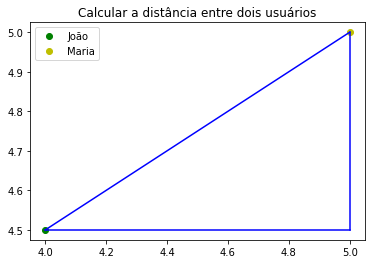

In [ ]:
# joao = [4, 4.5]
# maria = [5, 5]

import matplotlib.pyplot as plt

plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.legend(["João", "Maria"])
plt.title("Calcular a distância entre dois usuários")

plt.plot([4,5], [4.5, 4.5], color = "b", linestyle = "-")
plt.plot([4,5], [4.5, 5], color = "b", linestyle = "-")
plt.plot([5,5], [4.5, 5], color = "b", linestyle = "-")

In [ ]:
import numpy as np

joao = np.array([4, 4.5])
maria = np.array([5, 5])

joao - maria

array([-1. , -0.5])

In [ ]:
from math import sqrt

def pitagoras(a,b):
  (delta_x, delta_y) = a - b
  return sqrt(delta_x * delta_x + delta_y * delta_y)

pitagoras(joao, maria)

1.118033988749895

In [ ]:
def pitagoras (a,b):
  return np.linalg.norm(a - b)

pitagoras(joao, maria)

1.118033988749895

Text(0.5, 1.0, 'Calcular a distância entre dois usuários')

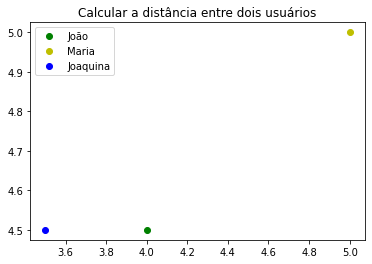

In [ ]:
import matplotlib.pyplot as plt

plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.plot(3.5, 4.5, "bo")
plt.legend(["João", "Maria", "Joaquina"])
plt.title("Calcular a distância entre dois usuários")

In [ ]:
joaquina = np.array([3.5, 4.5])

print(pitagoras(joao, maria))
print(pitagoras(joao, joaquina))

1.118033988749895
0.5


In [ ]:
def distancia_de_vetores (a,b):
  return np.linalg.norm(a - b)

In [ ]:
def notas_do_usuario(usuario):
  notas_do_usuario = notas.query("usuarioID ==  %d" % usuario)
  notas_do_usuario = notas_do_usuario[["filmeID", "nota"]].set_index("filmeID")
  return notas_do_usuario

In [ ]:
notas_do_usuario(4)

,nota
filmeID,
1,4.0
2,4.0
5,2.0
6,4.5
10,4.0
...,...
53972,3.5
53996,4.5
54286,5.0


In [ ]:
usuario1 = notas_do_usuario(1)
usuario4 = notas_do_usuario(4)

In [ ]:
usuario1.head()

,nota
filmeID,
307,3.5
481,3.5
1091,1.5
1257,4.5
1449,4.5


In [ ]:
usuario4.head()

,nota
filmeID,
1,4.0
2,4.0
5,2.0
6,4.5
10,4.0


In [ ]:
diferencas = usuario1.join(usuario4, lsuffix = "_esquerda", rsuffix = "_direita").dropna()
distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])

3.0413812651491097

In [ ]:
def distancia_de_usuarios(usuario_id1, usuario_id2):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix = "_esquerda", rsuffix = "_direita").dropna()
  distancia = distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [ ]:
distancia_de_usuarios(1, 4)

[1, 4, 3.0413812651491097]

In [ ]:
quantidade_de_usuarios = len(notas['usuarioID'].unique())
print("Temos %d usuarios" % quantidade_de_usuarios)

Temos 1686 usuarios


In [ ]:
def distancia_de_todos(voce_id):
  distancias = []
  for usuario_id in notas ['usuarioID'].unique():
    informacoes = distancia_de_usuarios(voce_id, usuario_id)
    distancias.append(informacoes)
  return distancias

distancia_de_todos(1)[:5]

[[1, 1, 0.0],
 [1, 2, 0.0],
 [1, 3, 0.0],
 [1, 4, 3.0413812651491097],
 [1, 5, 0.0]]

In [ ]:
def distancia_de_todos(voce_id):
  todos_os_usuarios = notas['usuarioID'].unique()
  distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
  distancias = pd.DataFrame(distancias, columns = ["voce", "outra_pessoa", "distancia"])
  return distancias

distancia_de_todos(1).head

<bound method NDFrame.head of       voce  outra_pessoa  distancia
0        1             1   0.000000
1        1             2   0.000000
2        1             3   0.000000
3        1             4   3.041381
4        1             5   0.000000
...    ...           ...        ...
1681     1          1682   0.000000
1682     1          1683   0.000000
1683     1          1684   0.000000
1684     1          1685   0.000000
1685     1          1686   2.121320

[1686 rows x 3 columns]>

In [ ]:
notas_do_usuario(1).join(notas_do_usuario(5), lsuffix = "_1", rsuffix = "_5")

,nota_1,nota_5
filmeID,,
307,3.5,NaN
481,3.5,NaN
1091,1.5,NaN
1257,4.5,NaN
1449,4.5,NaN
1590,2.5,NaN
1591,1.5,NaN
2134,4.5,NaN
2478,4.0,NaN


# Usuários sem nada em comum são colocados bem distante um do outro.

In [ ]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix = "_esquerda", rsuffix = "_direita").dropna()

  if(len(diferencas) < minimo):
    return[usuario_id1, usuario_id2, 100000]

  distancia = distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [ ]:
distancia_de_todos(1).head()

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,100000.000000
2,1,3,100000.000000
3,1,4,3.041381
4,1,5,100000.000000


In [ ]:
def mais_proximos_de(voce_id):
  distancias = distancia_de_todos(voce_id)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias

In [ ]:
mais_proximos_de(1).head()

,voce,distancia
outra_pessoa,,
593,1,1.118034
214,1,1.118034
590,1,1.322876
1180,1,1.414214
526,1,1.732051


# Parâmetros para teste

In [ ]:
def mais_proximos_de(voce_id, n = None):
  distancias = distancia_de_todos(voce_id, n = n)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias

In [ ]:
def distancia_de_todos(voce_id, n = None):
  todos_os_usuarios = notas['usuarioID'].unique()
  if n:
    todos_os_usuarios = todos_os_usuarios[:n]
  distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
  distancias = pd.DataFrame(distancias, columns = ["voce", "outra_pessoa", "distancia"])
  return distancias

In [ ]:
mais_proximos_de(1, n = 50)

,voce,distancia
outra_pessoa,,
4,1,3.041381
26,1,3.640055
48,1,100000.000000
28,1,100000.000000
29,1,100000.000000
30,1,100000.000000
31,1,100000.000000
32,1,100000.000000
33,1,100000.000000


In [ ]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix = "_esquerda", rsuffix = "_direita").dropna()

  if(len(diferencas) < minimo):
    return None

  distancia = distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [ ]:
def distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = None):
  todos_os_usuarios = notas['usuarioID'].unique()
  if numero_de_usuarios_a_analisar:
    todos_os_usuarios = todos_os_usuarios[:numero_de_usuarios_a_analisar]
  distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
  distancias = list(filter(None, distancias))
  distancias = pd.DataFrame(distancias, columns = ["voce", "outra_pessoa", "distancia"])
  return distancias

In [ ]:
def mais_proximos_de(voce_id, numero_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias

In [ ]:
mais_proximos_de(1, numero_de_usuarios_a_analisar = 100)

,voce,distancia
outra_pessoa,,
4,1,3.041381
26,1,3.640055
56,1,4.974937


In [ ]:
def sugere_para(voce, numero_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = mais_proximos_de(voce, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  similar = similares.iloc[0].name
  notas_do_similar = notas_do_usuario(similar)
  notas_do_similar = notas_do_similar.drop(filmes_que_voce_ja_viu, errors = 'ignore')
  recomendacoes = notas_do_similar.sort_values("nota", ascending = False)
  return recomendacoes.join(filmes)

In [ ]:
sugere_para(1).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeID,,,,,
3125,5.0,"End of the Affair, The (1999)",Drama,6.0,4.250000
2117,5.0,1984 (Nineteen Eighty-Four) (1984),Drama|Sci-Fi,29.0,3.793103
103984,5.0,"Great Beauty, The (Grande Bellezza, La) (2013)",Comedy|Drama,3.0,4.166667
4888,5.0,Tape (2001),Drama,6.0,4.000000
114635,5.0,"Look of Silence, The (2014)",Documentary,3.0,4.500000


# Sugerindo baseado em vários usuários

In [ ]:
def mais_proximos_de(voce_id, n_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias.head(n_mais_proximos)

In [ ]:
mais_proximos_de(1, n_mais_proximos = 2, numero_de_usuarios_a_analisar = 300)

,voce,distancia
outra_pessoa,,
214,1,1.118034
235,1,1.732051


In [ ]:
def sugere_para(voce, n_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = mais_proximos_de(voce, n_mais_proximos = n_mais_proximos, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index("usuarioID").loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby("filmeID").mean()[["nota"]]
  recomendacoes.sort_values("nota", ascending = False)
  return recomendacoes.join(filmes)

In [ ]:
voce = 1
n_mais_proximos = 10

numero_de_usuarios_a_analisar = 50

sugere_para(1).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeID,,,,,
1,3.812500,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,403.0,3.870968
2,3.333333,Jumanji (1995),Adventure|Children|Fantasy,158.0,3.088608
3,3.625000,Grumpier Old Men (1995),Comedy|Romance,90.0,3.161111
5,1.500000,Father of the Bride Part II (1995),Comedy,93.0,2.983871
6,4.333333,Heat (1995),Action|Crime|Thriller,182.0,3.706044


In [ ]:
def knn(voce_id, k_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias.head(k_mais_proximos)

In [ ]:
def sugere_para(voce, k_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = knn(voce, k_mais_proximos = k_mais_proximos, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index("usuarioID").loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby("filmeID").mean()[["nota"]]
  recomendacoes = recomendacoes.sort_values("nota", ascending = False)
  return recomendacoes.join(filmes)

# Testar um usuário novo

In [ ]:
filmes.loc[[122904, 1246, 2529, 2329, 2324, 1, 7, 2, 1196, 260]]

,titulo,generos,total_de_votos,nota_media
filmeID,,,,
122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,68.0,3.551471
1246,Dead Poets Society (1989),Drama,166.0,3.861446
2529,Planet of the Apes (1968),Action|Drama|Sci-Fi,87.0,3.747126
2329,American History X (1998),Crime|Drama,200.0,4.085000
2324,Life Is Beautiful (La Vita è bella) (1997),Comedy|Drama|Romance|War,177.0,4.022599
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,403.0,3.870968
7,Sabrina (1995),Comedy|Romance,93.0,3.026882
2,Jumanji (1995),Adventure|Children|Fantasy,158.0,3.088608
1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,387.0,4.072351


In [ ]:
def novo_usuario(dados):
  novo_usuario = notas['usuarioID'].max()+1
  notas_do_usuario_novo = pd.DataFrame(dados, columns=["filmeID", "nota"])
  notas_do_usuario_novo['usuarioID'] = novo_usuario
  return pd.concat([notas, notas_do_usuario_novo])

In [ ]:
notas = novo_usuario([[122904, 2], [1246, 5], [2529, 2], [2329, 5], [2324, 5], [1, 2], [7, 0.5], [2, 2], [1196,1], [260, 1]])
notas.tail()

,filmeID,usuarioID,nota,momento
5,1,1688,2.0,NaN
6,7,1688,0.5,NaN
7,2,1688,2.0,NaN
8,1196,1688,1.0,NaN
9,260,1688,1.0,NaN


In [ ]:
sugere_para(1687).head()

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,nota_media
filmeID,,,,,,
318,4.785714,7,"Shawshank Redemption, The (1994)",Crime|Drama,567.0,4.411817
2959,4.500000,7,Fight Club (1999),Action|Crime|Drama|Thriller,374.0,4.211230
2329,4.416667,6,American History X (1998),Crime|Drama,200.0,4.085000
1213,4.416667,6,Goodfellas (1990),Crime|Drama,226.0,4.119469
778,4.300000,5,Trainspotting (1996),Comedy|Crime|Drama,207.0,4.021739


# Utilizar somente as notas de filmes com mais de 50 votos

In [ ]:
notas = notas.set_index("filmeID").loc[filmes_com_mais_de_50_votos.index]
notas.head()

,usuarioID,nota,momento
filmeID,,,
1,4,4.0,1.113766e+09
1,10,5.0,9.488858e+08
1,14,4.5,1.442169e+09
1,15,4.0,1.370810e+09
1,22,4.0,1.237623e+09


In [ ]:
notas = notas.reset_index()
notas.head()

,filmeID,usuarioID,nota,momento
0,1,4,4.0,1.113766e+09
1,1,10,5.0,9.488858e+08
2,1,14,4.5,1.442169e+09
3,1,15,4.0,1.370810e+09
4,1,22,4.0,1.237623e+09


In [ ]:
sugere_para(1687).head()

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,nota_media
filmeID,,,,,,
318,4.785714,7,"Shawshank Redemption, The (1994)",Crime|Drama,567.0,4.411817
2959,4.500000,7,Fight Club (1999),Action|Crime|Drama|Thriller,374.0,4.211230
2329,4.416667,6,American History X (1998),Crime|Drama,200.0,4.085000
1213,4.416667,6,Goodfellas (1990),Crime|Drama,226.0,4.119469
778,4.300000,5,Trainspotting (1996),Comedy|Crime|Drama,207.0,4.021739


In [ ]:
def sugere_para(voce, k_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = knn(voce, k_mais_proximos = k_mais_proximos, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index("usuarioID").loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby("filmeID").mean()[["nota"]]
  aparicoes = notas_dos_similares.groupby("filmeID").count()[['nota']]

  filtro_minimo = k_mais_proximos / 2
  recomendacoes = recomendacoes.join(aparicoes, lsuffix = "_media_dos_usuarios", rsuffix = "_aparicoes_nos_usuarios")
  recomendacoes = recomendacoes.query("nota_aparicoes_nos_usuarios >=  %.2f" % filtro_minimo)
  recomendacoes = recomendacoes.sort_values("nota_media_dos_usuarios", ascending = False)
  recomendacoes = recomendacoes.drop(filmes_que_voce_ja_viu, errors = 'ignore')
  return recomendacoes.join(filmes)

In [ ]:
def knn(voce_id, k_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
  distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id, errors = 'ignore')
  return distancias.head(k_mais_proximos)

In [ ]:
sugere_para(1, numero_de_usuarios_a_analisar = 500)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,nota_media
filmeID,,,,,,


In [ ]:
sugere_para(1687).head(10)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,nota_media
filmeID,,,,,,
318,4.785714,7,"Shawshank Redemption, The (1994)",Crime|Drama,567.0,4.411817
2959,4.500000,7,Fight Club (1999),Action|Crime|Drama|Thriller,374.0,4.211230
1213,4.416667,6,Goodfellas (1990),Crime|Drama,226.0,4.119469
778,4.300000,5,Trainspotting (1996),Comedy|Crime|Drama,207.0,4.021739
527,4.200000,5,Schindler's List (1993),Drama|War,449.0,4.224944
48516,4.166667,6,"Departed, The (2006)",Crime|Drama|Thriller,145.0,4.155172
47,4.166667,6,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,339.0,4.087021
1193,4.166667,6,One Flew Over the Cuckoo's Nest (1975),Drama,242.0,4.165289
593,4.166667,6,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,523.0,4.086042


In [ ]:
sugere_para(8621, k_mais_proximos = 20).head(10)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,nota_media
filmeID,,,,,,
